In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def func(t, a1, a2, t0, tc, c):
    return a1 * np.exp(-t * (1/t0 + 1/tc)) + a2 * np.exp(-t/t0) + c

In [3]:
t1 = pd.read_csv("Matt_Jacob_10_8.data", delimiter = ' ', names = ["Delta_T", "Timestamp"])
t2 = pd.read_csv("muon_data_Jacob_Matt_10_10.data", delimiter = ' ', names = ["Delta_T", "Timestamp"])
t3 = pd.read_csv("Bjon_10_15.data", delimiter = ' ', names = ["Delta_T", "Timestamp"])
t4 = pd.read_csv("muon_data_Jacob_Matt_10_17.data", delimiter = ' ', names = ["Delta_T", "Timestamp"])

In [4]:
t = t1.append(t2)
t = t.append(t3)
t = t.append(t4)

In [5]:
t = t[t["Delta_T"] < 20000]

In [6]:
len(t)

12054

In [7]:
max_bins = np.arange(0,20000, 160)
print("Maximum number of bins: " + str(len(max_bins)))

Maximum number of bins: 125


In [8]:
bins = np.linspace(100, 20000, 80)

In [9]:
ydata, xdata = np.histogram(t["Delta_T"], bins = bins)
xdata = xdata[:-1]

In [43]:
bounds = ([-np.inf, -np.inf, 2000, 10, -np.inf], [np.inf, 1000, np.inf, np.inf, np.inf])

In [44]:
popt, pcov = curve_fit(func, xdata, ydata, bounds = bounds) #p0 = [0, 1/2197, 0]

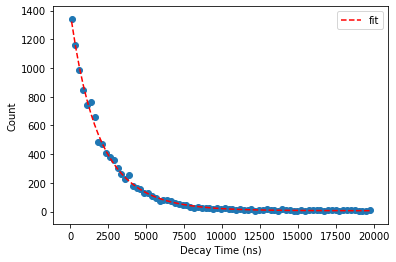

In [45]:
plt.plot(xdata, func(xdata, *popt), 'r--', label='fit')
plt.scatter(xdata, ydata)
# plt.title("Applying Fit 7.1")
plt.ylabel("Count")
plt.xlabel("Decay Time (ns)")
plt.legend()
plt.savefig("Fit7,1.png")

In [46]:
print(str(round(popt[0], 2)) + " * e^(-t[1/" + str(round(popt[2], 2)) + ' + 1/' + str(round(popt[3], 2)) + ']) + ' + str(round(popt[1], 2)) + 
     ' * e^(-t/' + str(round(popt[2], 2)) + ') + ' + str(round(popt[4], 2)))

392.38 * e^(-t[1/2366.46 + 1/2139.75]) + 1000.0 * e^(-t/2366.46) + 6.3


In [47]:
residuals = np.log(ydata)- np.log(func(xdata, *popt))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)

In [48]:
r_squared

0.9999990825338486

In [51]:
std = np.sqrt(np.diag(pcov))

In [52]:
std[2]/popt[2]

0.15663195323715393